In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("2018.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2018,17648,127,22,3518
1,2018,17399,50,15,3551
2,2018,17264,253,36,3501
3,2018,17465,125,26,3522
4,2018,17734,158,13,3530
...,...,...,...,...,...
1862,2018,17378,237,14,3503
1863,2018,17334,373,16,3528
1864,2018,17853,286,35,3547
1865,2018,17263,180,21,3547


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1867, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1867 non-null   int64
 1   Maximum length (m))  1867 non-null   int64
 2   Recession(m),        1867 non-null   int64
 3   Rate/yr(m)           1867 non-null   int64
 4   Snout altitude (m)   1867 non-null   int64
dtypes: int64(5)
memory usage: 73.1 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1867


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2018,17648,127,22,3518
1,2018,17399,50,15,3551
2,2018,17264,253,36,3501
3,2018,17465,125,26,3522
4,2018,17734,158,13,3530


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0036,0.0263,-0.0006
"Recession(m),",NaN,-0.0036,1.0000,0.0165,-0.0023
Rate/yr(m),NaN,0.0263,0.0165,1.0000,-0.0391
Snout altitude (m),NaN,-0.0006,-0.0023,-0.0391,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0263
Snout altitude (m)    -0.0006
Recession(m),         -0.0036
Year                      NaN
Name: Maximum length (m)), dtype: float64

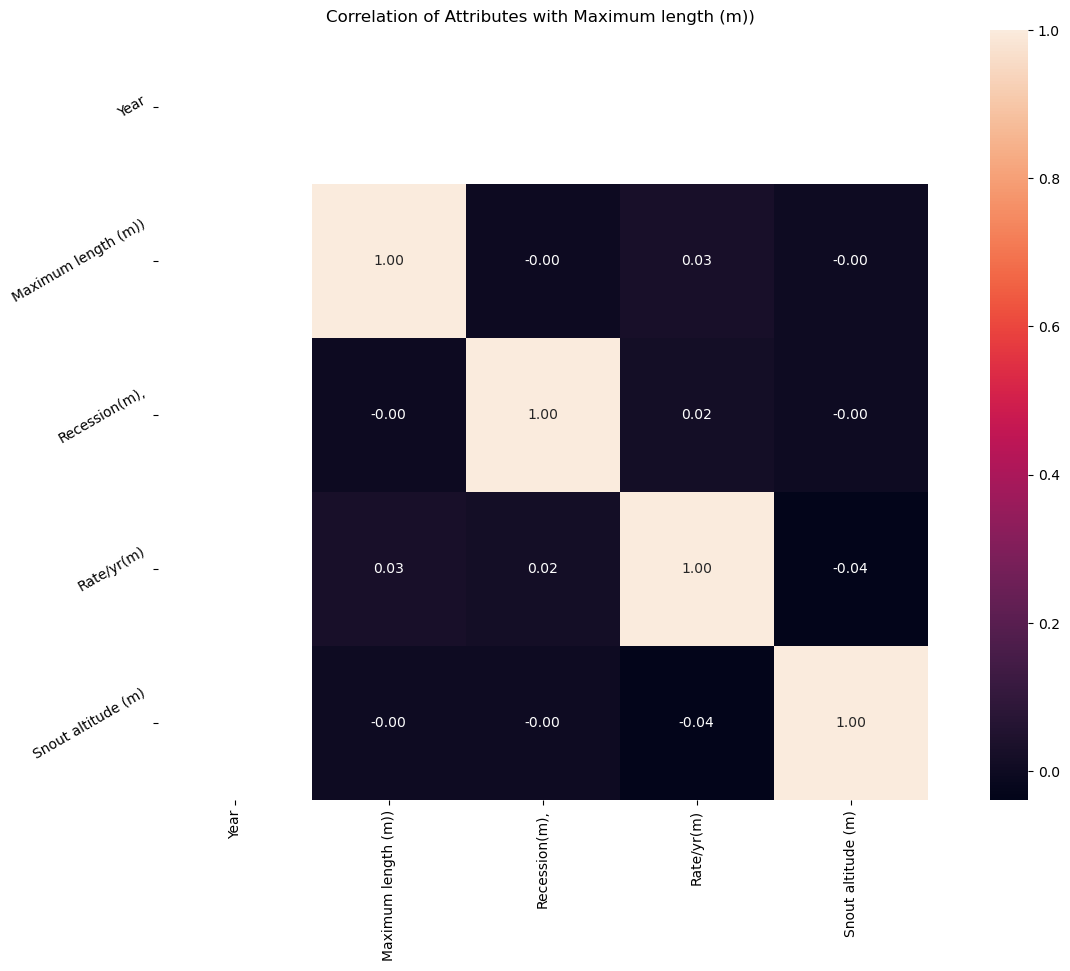

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,867.0000","1,867.0000","1,867.0000","1,867.0000","1,867.0000"
mean,"2,018.0000","17,556.7167",221.1821,27.6626,"3,532.3637"
std,0.0000,297.9216,124.2473,8.6973,20.5244
min,"2,018.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,018.0000","17,297.5000",115.0000,20.0000,"3,515.0000"
50%,"2,018.0000","17,564.0000",222.0000,28.0000,"3,533.0000"
75%,"2,018.0000","17,808.5000",326.0000,35.0000,"3,550.0000"
max,"2,018.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()
    

2018   1.0000
Name: Year, dtype: float64

240   0.0054
217   0.0054
271   0.0054
296   0.0054
97    0.0054
       ...  
416   0.0005
292   0.0005
379   0.0005
3     0.0005
132   0.0005
Name: Recession(m),, Length: 435, dtype: float64

20   0.0439
42   0.0391
22   0.0386
34   0.0386
27   0.0375
16   0.0375
41   0.0364
35   0.0359
36   0.0354
31   0.0348
30   0.0348
40   0.0343
15   0.0343
33   0.0337
32   0.0337
21   0.0321
17   0.0321
26   0.0316
14   0.0316
18   0.0316
24   0.0316
37   0.0316
25   0.0311
38   0.0311
29   0.0305
13   0.0300
39   0.0279
28   0.0279
19   0.0262
23   0.0246
Name: Rate/yr(m), dtype: float64

3528   0.0220
3497   0.0198
3531   0.0198
3545   0.0187
3532   0.0182
        ...  
3537   0.0096
3513   0.0096
3503   0.0091
3564   0.0080
3496   0.0011
Name: Snout altitude (m), Length: 72, dtype: float64



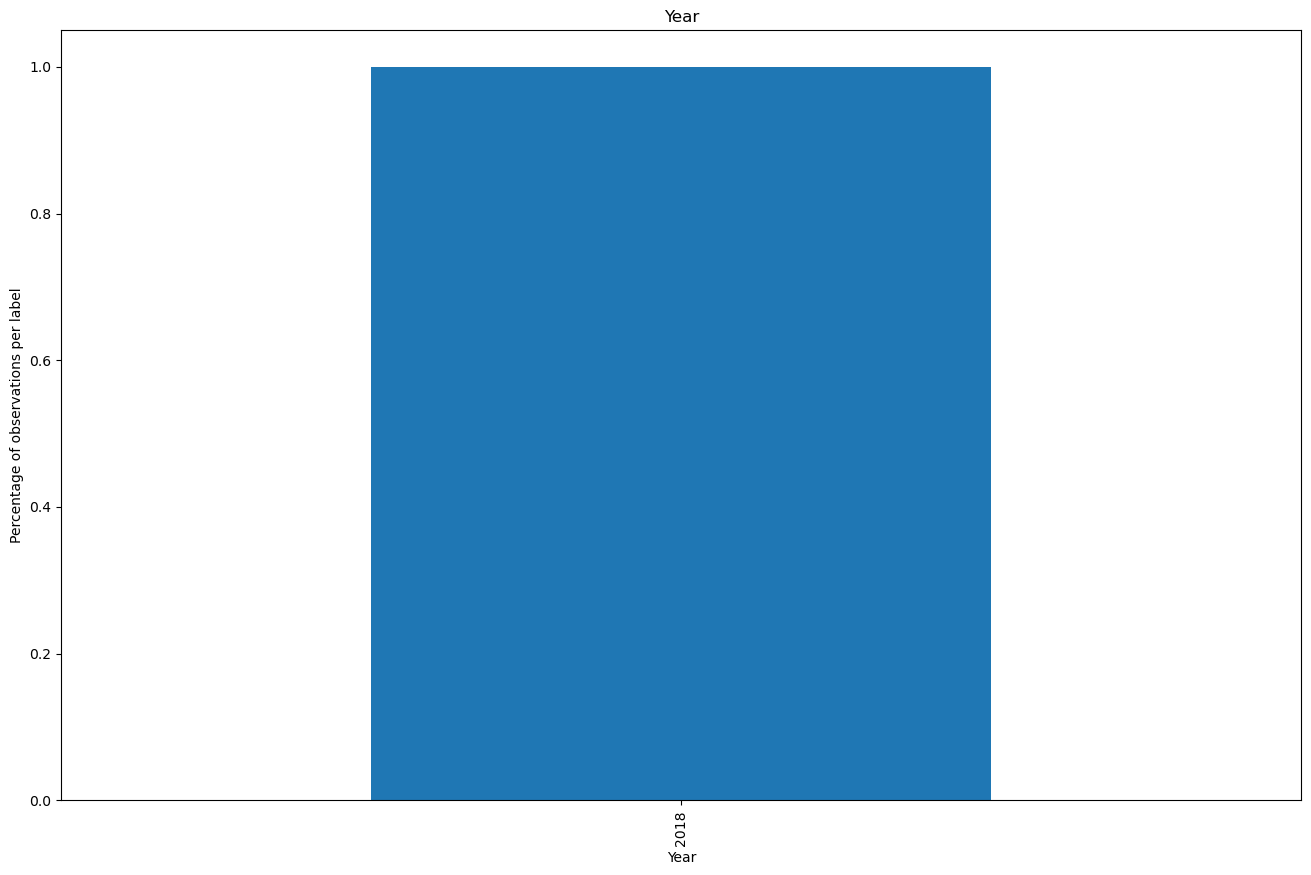

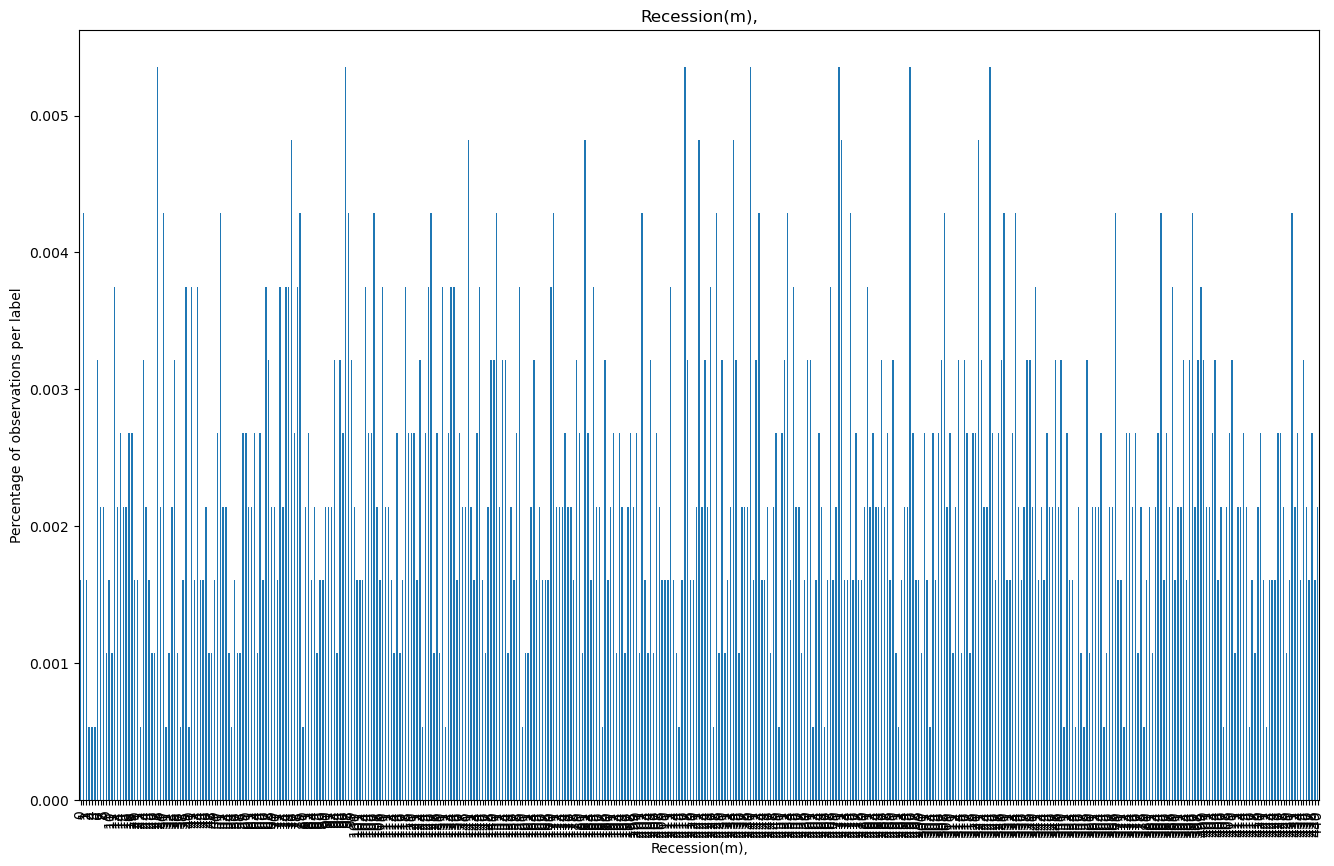

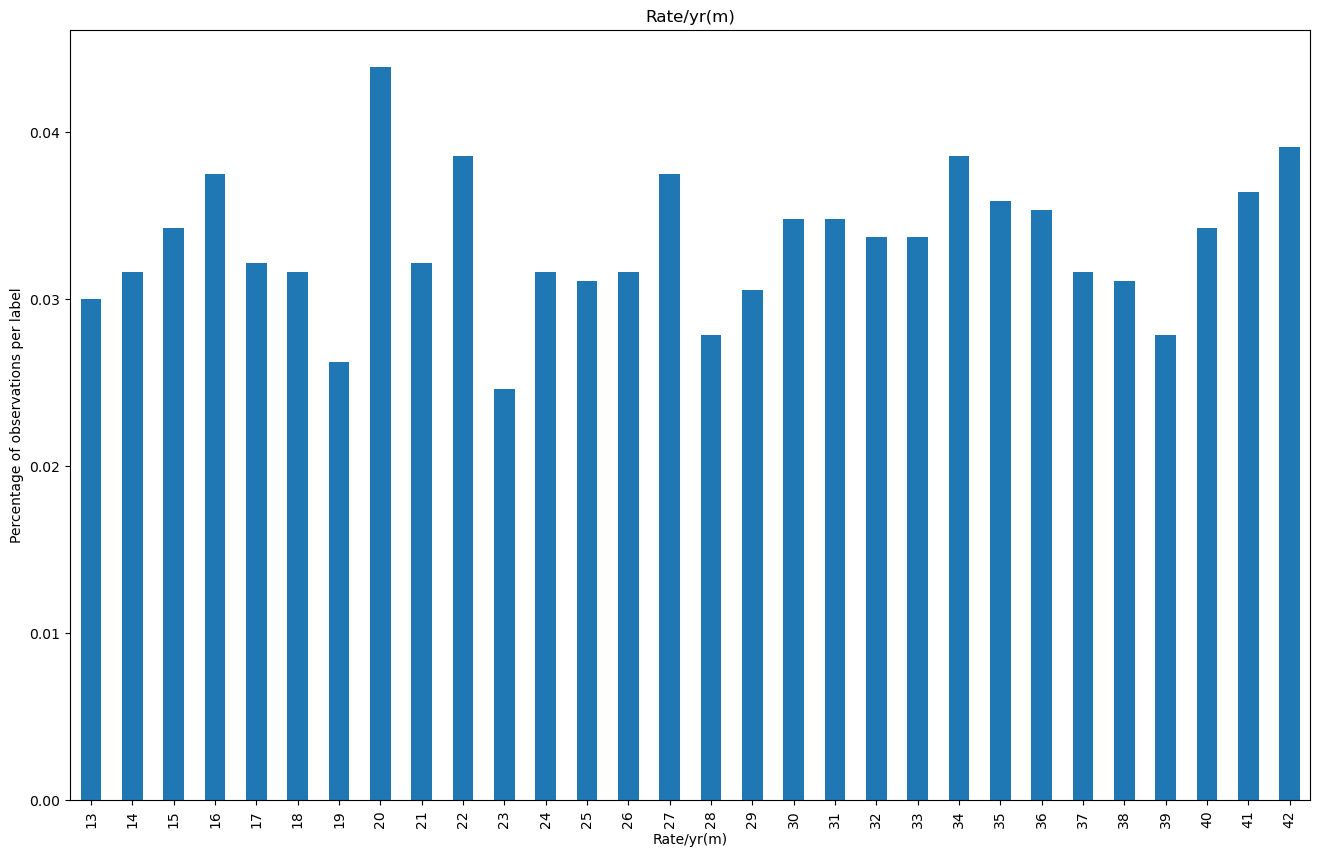

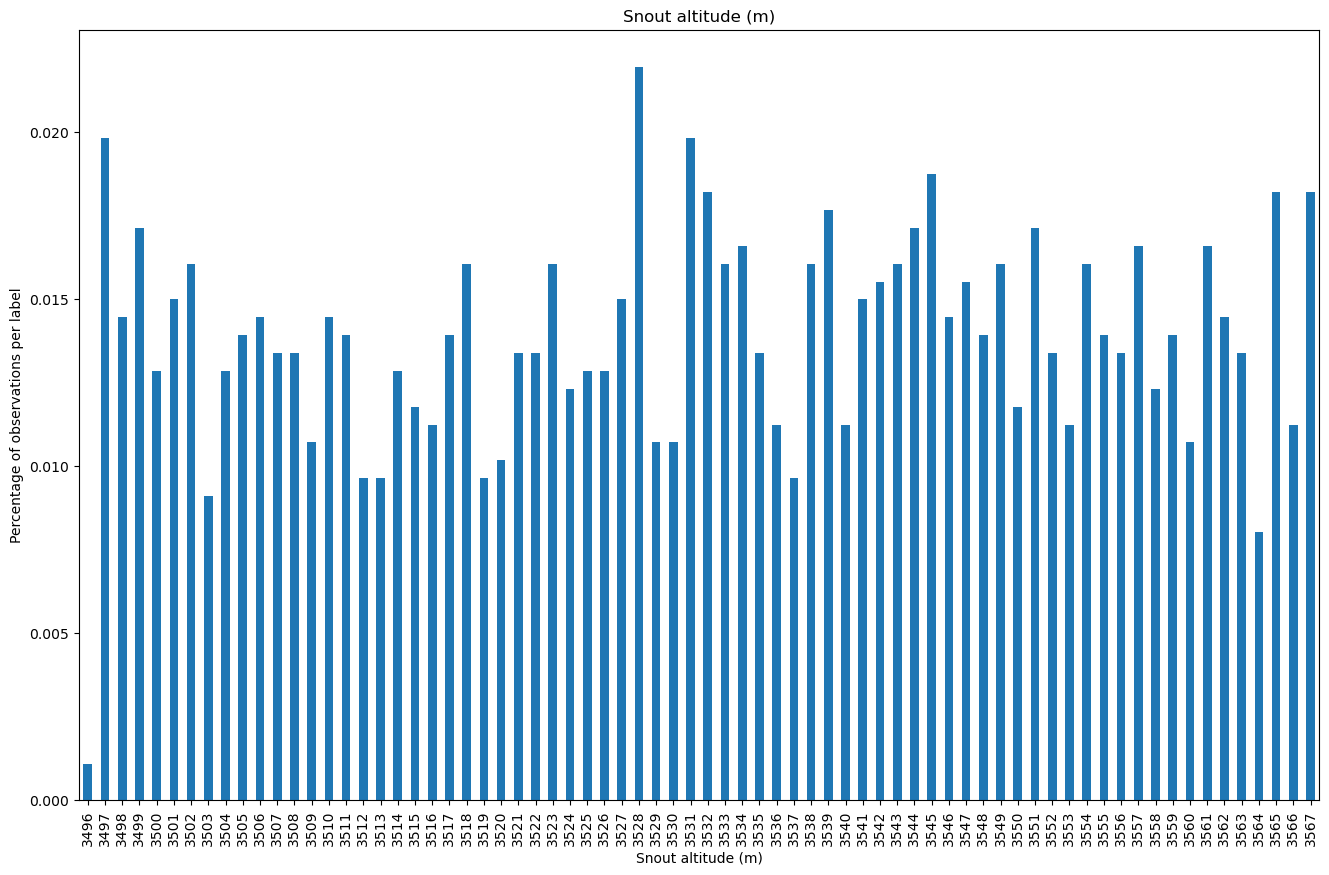

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()